# Supervised Learning Lab
### Jawadul (Salvin Chowdhury)
In this lab you will be experimenting with several supervised learning methods.  Let's start by importing a few things.  

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We first generate some dummy data from random samples in a 2D space from 4 clusters.


In [3]:
n_samples = 64
variance = 0.1

# 4 clusters in a 2D space
centers = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

X, y = make_blobs(n_samples,
                  centers=centers,
                  cluster_std = np.sqrt(variance),
                  shuffle=True)

We now define a function to create and train a kNN classifier.  Calling this function will generate some print statements that show the confusion matrix output.  

In [4]:
def run_knn(X_train, y_train, X_test, y_test, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))
    pred = knn.predict(X_test)
    print(confusion_matrix(y_test, pred))

## Exercise 1:
Use matplot lib to plot the groups of the ``X`` values coloring the points according to their labels (``y``).  Then add two lines to the plot that show your approximation of where linear decision boundaries might lie to optimally separate the classes.

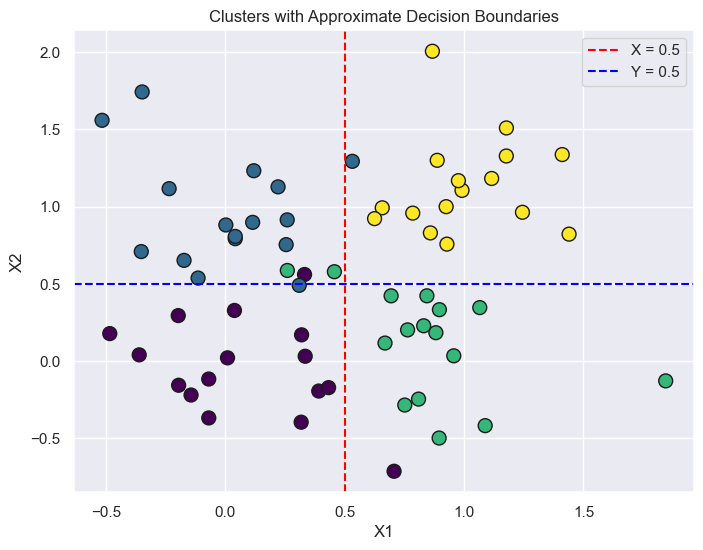

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", marker="o", edgecolor="k", s=100)
plt.xlabel("X1")
plt.ylabel("X2")

# Adding approximate linear decision boundaries
plt.axvline(x=0.5, color='red', linestyle='--', label='X = 0.5')  # Vertical boundary at X1 = 0.5
plt.axhline(y=0.5, color='blue', linestyle='--', label='Y = 0.5')  # Horizontal boundary at X2 = 0.5

# Display plot with legend
plt.legend()
plt.title("Clusters with Approximate Decision Boundaries")
plt.show()

Next, lets see how well this data can be classified with kNN

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
run_knn(X_train, y_train, X_test, y_test, 5)

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.94
[[6 0 0 0]
 [0 1 0 0]
 [0 1 5 0]
 [0 0 0 3]]


## Exercise 2:
Experiment in the next cell with adjusting the variance when building additional random datasets.  Write a few statements in your reflection below about how the variance affected the accuracy and whether overfitting occured.  

### Reflection
TODO

Next, we import some data.  

## Exercise 3:
Read through the website: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset where the following dataset was obtained.  Create a feature description below.

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

## Feature Description
TBD

## Exercise 4:
Extract the age and hypertension columns as input features and stroke as output labels from the dataframe.  Scale and split the data and then run the knn training and evaluation.  

Fill out the Reflection cell below describing what you observe.  Make sure you identify if overfitting is occuring.  

### Reflection
TODO

## Exercise 5:
There are a few things going on here.  First, we have a significant class imbalance problem.  Write a 1-liner to calculate the ratio of stroke to non stroke patients in the dataset.

OK, so that is a really imbalanced class.  To help resolve this, we are going to experiment with random oversampling and undersampling in our training dataset.  

## Exercise 6:
Figure out which class has fewer and how many samples exist for that class.  Use the ``sample()`` method to undersample the data: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html  Join the results back into a single dataframe that represents the undersampled data (appropriately named).

Confirm the number of samples in each class using ``value_counts()``.

## Exercise 7:
Next, re-run the kNN training and determine the updated accuracy and confusion matrix.  Write a few statements below for your reflection on the results.  Make sure you answer the question, did overfitting occur?

### Reflection

TBD

## Exercise 8:
Next, you should oversample the data and store the results in an appropriately-named dataframe.  Again, you should use ``sample()``.

## Exercise 9:
Next, re-run the kNN training and determine the updated accuracy and confusion matrix.  Write a few statements below for your reflection on the results.  Make sure you answer the question, did overfitting occur?

### Reflection:

TBD

## Exercise 10:
Next, you should try at least two other combinations of features to see what affects they have on accuracy.  At least one of your experiments should include categorical variables that have been converted to numerical.  You should also experiment with at least 2 additional values of k.  In total, you should run at least 5 experiments, and you should document the results in a table below in the reflection section.  

### Reflection
TODO

## Exercise 11:
Next, you should experiment with a couple of different distance metrics.  To change the metric, you should add a parameter (with an appropriate default) to the run_knn function and use the parameter to set the metric like this: ``KNeighborsClassifier(n_neighbors=2, metric=metric)``.  Metric options can be seen here: https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

Try at least 3 different metrics with the "best" accuracy configuration.  Document the results in a table in the reflection section below.  Please also record any observations about using different metrics.  

### Reflection
TODO